In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [110]:
data = pd.read_csv('Year 2010-2011.csv')
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


# Data preprocessing

In [111]:
# We will use only UK data as it is the country with the largest sales. 
# Extract data only for UK and only required columns
df = data[['InvoiceDate','StockCode','Description','Quantity','Price']][(data['Country']) == 'United Kingdom']
df

,InvoiceDate,StockCode,Description,Quantity,Price
0,12/1/2010 8:26,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55
1,12/1/2010 8:26,71053,WHITE METAL LANTERN,6,3.39
2,12/1/2010 8:26,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75
3,12/1/2010 8:26,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39
4,12/1/2010 8:26,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39
...,...,...,...,...,...
541889,12/9/2011 12:31,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,1.95
541890,12/9/2011 12:49,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2.95
541891,12/9/2011 12:49,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,1.25
541892,12/9/2011 12:49,21217,RED RETROSPOT ROUND CAKE TINS,24,8.95


## Check missing values

In [112]:
# Luckily there's none
df.isnull().any()

InvoiceDate    False
StockCode      False
Description     True
Quantity       False
Price          False
dtype: bool

## Deal with outliers 

In [113]:
# Look at descriptive statistics. 
# Seems like there is negative price and quantity, which is faulty, and also 
# a suspiciaously high maximum of these variables
df.describe()

,Quantity,Price
count,495478.000000,495478.000000
mean,8.605486,4.532422
std,227.588756,99.315438
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.100000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [114]:
# Look at rows with negative quantity
df[df['Quantity'] < 0]

,InvoiceDate,StockCode,Description,Quantity,Price
141,12/1/2010 9:41,D,Discount,-1,27.50
154,12/1/2010 9:49,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,4.65
235,12/1/2010 10:24,22556,PLASTERS IN TIN CIRCUS PARADE,-12,1.65
236,12/1/2010 10:24,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,0.29
237,12/1/2010 10:24,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,0.29
...,...,...,...,...,...
540449,12/9/2011 9:57,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,0.83
541541,12/9/2011 10:28,M,Manual,-1,224.69
541715,12/9/2011 11:57,21258,VICTORIAN SEWING BOX LARGE,-5,10.95
541716,12/9/2011 11:58,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,1.25


In [115]:
# There is a lot of rows with negative quantity. It's probably due to errors during data entry process.
# We'll just convert them to positive numbers
df['Quantity'] = abs(df['Quantity'])

df[df['Quantity'] < 0]

,InvoiceDate,StockCode,Description,Quantity,Price


<AxesSubplot:xlabel='Row number', ylabel='Price'>

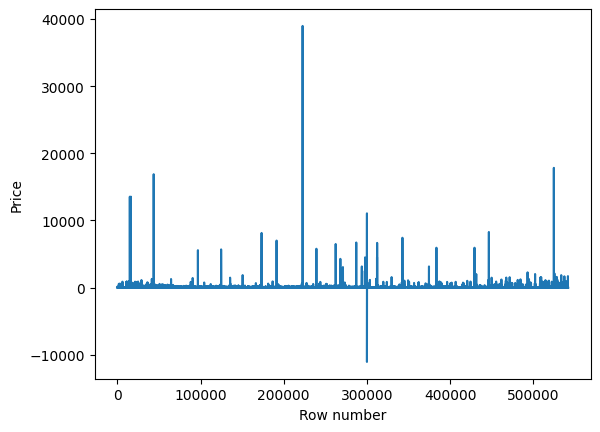

In [116]:
# Look at the price distribution
df['Price'].plot(ylabel='Price', xlabel='Row number')

In [117]:
# Seems like there's many orders with very high price of few thousands, so it's not a random error. 
# Let's look more closely at orders with high prices
df[df['Price'] > 5000]

,InvoiceDate,StockCode,Description,Quantity,Price
15016,12/7/2010 15:04,AMAZONFEE,AMAZON FEE,1,13541.33
15017,12/7/2010 15:08,AMAZONFEE,AMAZON FEE,1,13541.33
16002,12/7/2010 15:34,AMAZONFEE,AMAZON FEE,1,13474.79
16313,12/7/2010 15:41,AMAZONFEE,AMAZON FEE,1,5519.25
16356,12/7/2010 15:49,AMAZONFEE,AMAZON FEE,1,13541.33
16357,12/7/2010 15:51,AMAZONFEE,AMAZON FEE,1,6706.71
43702,1/5/2011 9:55,AMAZONFEE,AMAZON FEE,1,16888.02
43703,1/5/2011 9:57,AMAZONFEE,AMAZON FEE,1,16453.71
96844,2/21/2011 15:07,AMAZONFEE,AMAZON FEE,1,5575.28
96845,2/21/2011 15:11,AMAZONFEE,AMAZON FEE,1,5258.77


<AxesSubplot:xlabel='Row number', ylabel='Price'>

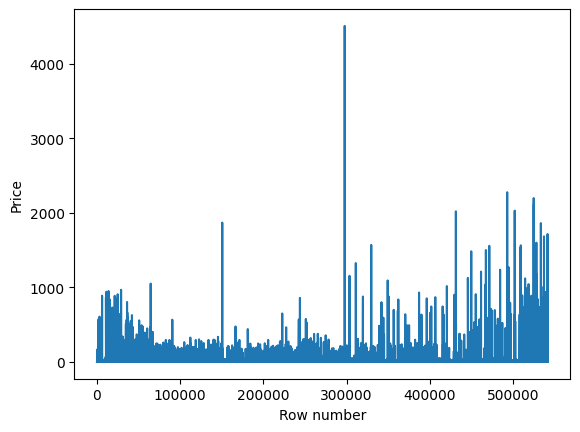

In [118]:
# So, it's various fees. 
# These are not products we're going to analyze, so we can drop all rows with these Stock Codes  
df = df[~((df['StockCode'] == 'AMAZONFEE') | (df['StockCode'] == 'POST') | (df['StockCode'] == 'M') | (df['StockCode'] == 'B'))]

# Look at the price distribution - much better!
df['Price'].plot(ylabel='Price', xlabel='Row number')

In [119]:
# Still, there's too many 500$+ orders, which is far from the mean value of 4.53. 
# Let's see what these products are
df[df['Price'] > 500 ]

,InvoiceDate,StockCode,Description,Quantity,Price
1815,12/1/2010 14:32,DOT,DOTCOM POSTAGE,1,569.77
3041,12/1/2010 17:06,DOT,DOTCOM POSTAGE,1,607.49
6165,12/3/2010 11:36,DOT,DOTCOM POSTAGE,1,887.52
10812,12/6/2010 9:58,DOT,DOTCOM POSTAGE,1,863.74
11381,12/6/2010 10:08,DOT,DOTCOM POSTAGE,1,940.87
...,...,...,...,...,...
536834,12/8/2011 9:28,DOT,DOTCOM POSTAGE,1,1008.96
537254,12/8/2011 10:53,DOT,DOTCOM POSTAGE,1,1683.75
539368,12/8/2011 16:30,DOT,DOTCOM POSTAGE,1,938.59
540908,12/9/2011 10:03,DOT,DOTCOM POSTAGE,1,933.17


<AxesSubplot:xlabel='Row number', ylabel='Price'>

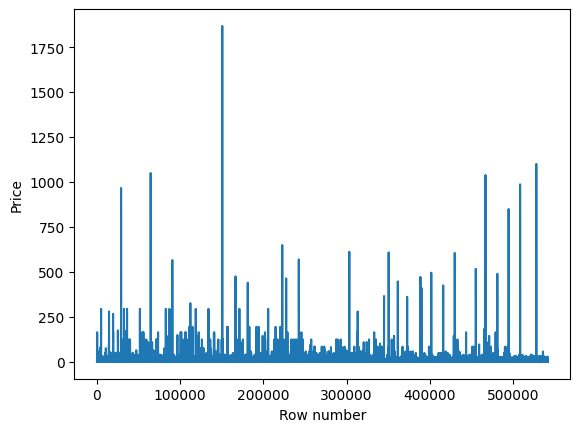

In [120]:
# That is again not a regular product we would analyze, so drop it
df = df[~(df['StockCode'] == 'DOT')]

# Look at the price distribution 
df['Price'].plot(ylabel='Price', xlabel='Row number')

In [121]:
df[df['Price'] > 500 ]

,InvoiceDate,StockCode,Description,Quantity,Price
28992,12/13/2010 17:10,BANK CHARGES,Bank Charges,1,966.92
64573,1/20/2011 11:50,BANK CHARGES,Bank Charges,1,1050.15
90558,2/15/2011 12:39,BANK CHARGES,Bank Charges,1,566.37
150591,4/8/2011 14:17,D,Discount,1,1867.86
222671,6/10/2011 15:28,22502,PICNIC BASKET WICKER 60 PIECES,60,649.50
222682,6/10/2011 15:33,22502,PICNIC BASKET WICKER 60 PIECES,1,649.50
242592,6/28/2011 15:10,S,SAMPLES,1,570.00
303275,8/17/2011 11:38,BANK CHARGES,Bank Charges,1,612.46
350582,9/21/2011 14:40,CRUK,CRUK Commission,1,608.66
429996,10/31/2011 14:09,CRUK,CRUK Commission,1,606.00


<AxesSubplot:xlabel='Row number', ylabel='Price'>

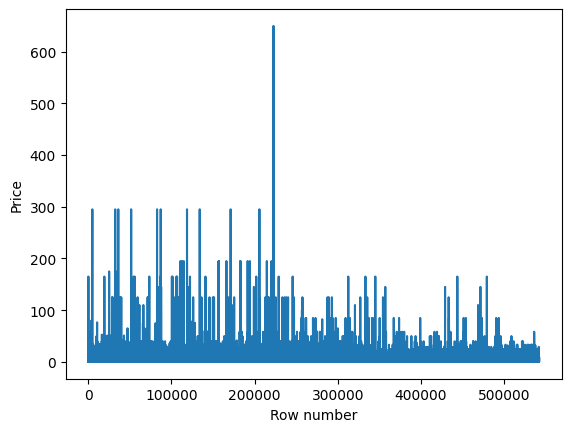

In [122]:
# That is again not a regular product we would analyze, so drop it
df = df[~((df['StockCode'] == 'CRUK') | (df['StockCode'] == 'BANK CHARGES') | (df['StockCode'] == 'D') | (df['StockCode'] == 'S'))]

# Look at the price distribution 
df['Price'].plot(ylabel='Price', xlabel='Row number')

In [123]:
# See if there're any other products that are not really products
df[~df['StockCode'].str.contains('\d')].value_counts()

InvoiceDate       StockCode  Description                 Quantity  Price
10/19/2011 16:59  DCGSSGIRL  GIRLS PARTY BAG             1         3.290    1
4/18/2011 13:13   DCGSSBOY   BOYS PARTY BAG              1         3.290    1
9/25/2011 14:58   PADS       PADS TO MATCH ALL CUSHIONS  1         0.001    1
9/25/2011 12:22   PADS       PADS TO MATCH ALL CUSHIONS  1         0.000    1
8/30/2011 12:26   DCGSSGIRL  GIRLS PARTY BAG             1         3.290    1
8/10/2011 16:51   DCGSSGIRL  GIRLS PARTY BAG             5         3.290    1
7/26/2011 10:13   PADS       PADS TO MATCH ALL CUSHIONS  1         0.001    1
7/25/2011 16:57   DCGSSGIRL  GIRLS PARTY BAG             5         1.250    1
                  DCGSSBOY   BOYS PARTY BAG              2         1.250    1
7/13/2011 16:07   DCGSSBOY   BOYS PARTY BAG              20        3.290    1
5/6/2011 16:01    DCGSSGIRL  GIRLS PARTY BAG             2         3.290    1
                  DCGSSBOY   BOYS PARTY BAG              7         3.

In [124]:
# There's one, 'm'. Drop it
df = df[~(df['StockCode'] == 'm')]

<AxesSubplot:xlabel='Row number', ylabel='Quantity'>

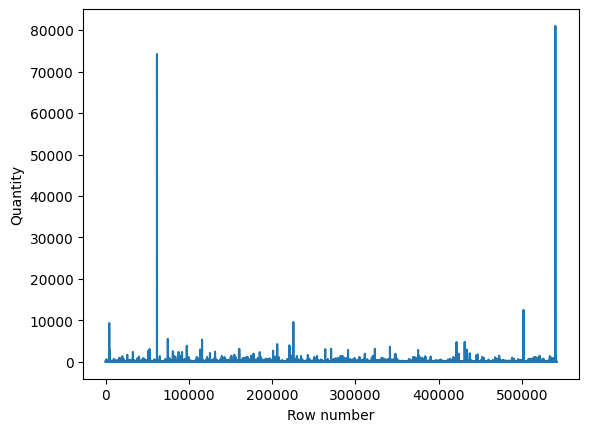

In [125]:
# Look at anomaly big numbers in Quantity
df['Quantity'].plot(ylabel='Quantity', xlabel='Row number')

In [126]:
df[df['Quantity'] > 2000]

,InvoiceDate,StockCode,Description,Quantity,Price
4268,12/2/2010 14:23,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,9360,0.03
4945,12/2/2010 17:38,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,0.18
32671,12/16/2010 10:35,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,0.94
50849,1/10/2011 10:36,22617,"mouldy, thrown away.",2600,0.00
52711,1/11/2011 12:55,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2.10
61619,1/18/2011 10:01,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1.04
61624,1/18/2011 10:17,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1.04
74614,1/28/2011 12:03,37413,NaN,5568,0.00
74615,1/28/2011 12:04,79063D,NaN,2560,0.00
80742,2/3/2011 10:50,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2592,0.21


In [127]:
# Seems like these are legit orders. ANother observation is that some items are with zero price.
# We should drop zero-price items, as they don't bring any revenue
df = df[~(df['Price'] == 0)]

In [128]:
df[df['Quantity'] > 2000]

,InvoiceDate,StockCode,Description,Quantity,Price
4268,12/2/2010 14:23,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,9360,0.03
4945,12/2/2010 17:38,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,0.18
32671,12/16/2010 10:35,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,0.94
52711,1/11/2011 12:55,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2.10
61619,1/18/2011 10:01,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1.04
61624,1/18/2011 10:17,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1.04
80742,2/3/2011 10:50,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2592,0.21
87631,2/11/2011 11:22,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,0.94
91772,2/16/2011 12:10,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,2400,0.06
97432,2/22/2011 10:43,22053,EMPIRE DESIGN ROSETTE,3906,0.82


In [131]:
# Now everything looks correct
df.describe()

,Quantity,Price
count,491431.000000,491431.000000
mean,9.996358,3.314864
std,225.107274,4.572851
min,1.000000,0.001000
25%,1.000000,1.250000
50%,3.000000,2.100000
75%,10.000000,4.130000
max,80995.000000,649.500000


In [ ]:
# However, we will drop outliers with enormous Quantity, because their presence can 
# lead to false conclusions about the data in ABC analysis. 

In [149]:
df[df['Quantity'] > 100]

,InvoiceDate,StockCode,Description,Quantity,Price
96,2010-12-01 09:37:00,21212,PACK OF 72 RETROSPOT CAKE CASES,120,0.42
178,2010-12-01 09:58:00,79321,CHILLI LIGHTS,192,3.82
179,2010-12-01 09:58:00,22780,LIGHT GARLAND BUTTERFILES PINK,192,3.37
180,2010-12-01 09:58:00,22779,WOODEN OWLS LIGHT GARLAND,192,3.37
181,2010-12-01 09:58:00,22466,FAIRY TALE COTTAGE NIGHTLIGHT,432,1.45
...,...,...,...,...,...
540442,2011-12-09 09:44:00,21137,BLACK RECORD COVER FRAME,120,3.39
541286,2011-12-09 10:23:00,22355,CHARLOTTE BAG SUKI DESIGN,110,2.46
541545,2011-12-09 10:46:00,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,180,0.19
541702,2011-12-09 11:50:00,23404,HOME SWEET HOME BLACKBOARD,144,3.26


<AxesSubplot:xlabel='Row number', ylabel='Quantity'>

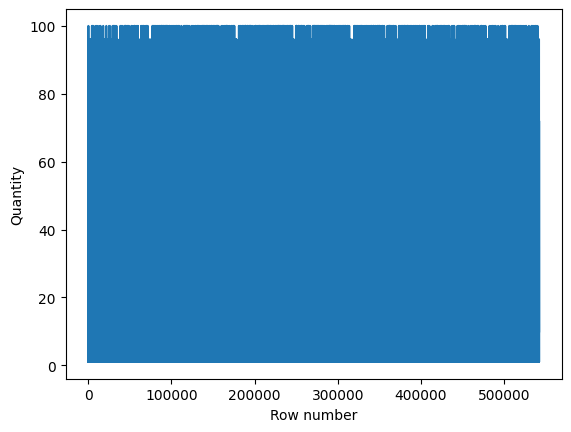

In [154]:
# We will drop them at Quantity > 100, comprising 3604 rows or less than 1% of the data
df2 = df[~(df['Quantity'] > 100)]
df2['Quantity'].plot(ylabel='Quantity', xlabel='Row number')

In [152]:
df2.describe()

,Quantity,Price
count,487827.000000,487827.000000
mean,7.339077,3.327811
std,11.862968,4.584951
min,1.000000,0.001000
25%,1.000000,1.250000
50%,3.000000,2.100000
75%,10.000000,4.130000
max,100.000000,649.500000


In [153]:
df2

,InvoiceDate,StockCode,Description,Quantity,Price
0,2010-12-01 08:26:00,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55
1,2010-12-01 08:26:00,71053,WHITE METAL LANTERN,6,3.39
2,2010-12-01 08:26:00,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75
3,2010-12-01 08:26:00,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39
4,2010-12-01 08:26:00,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39
...,...,...,...,...,...
541889,2011-12-09 12:31:00,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,1.95
541890,2011-12-09 12:49:00,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2.95
541891,2011-12-09 12:49:00,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,1.25
541892,2011-12-09 12:49:00,21217,RED RETROSPOT ROUND CAKE TINS,24,8.95


In [155]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487827 entries, 0 to 541893
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceDate  487827 non-null  datetime64[ns]
 1   StockCode    487827 non-null  object        
 2   Description  487827 non-null  object        
 3   Quantity     487827 non-null  int64         
 4   Price        487827 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 22.3+ MB


In [156]:
df2.to_csv('data_without_outliers.csv')